In [1]:
import pandas as pd
import numpy as np

# Data

In [3]:
train_df = pd.DataFrame(pd.read_csv('../resources/train.csv'))
train_df

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


# Explore

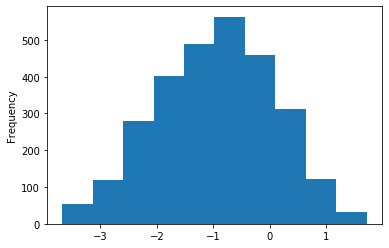

In [6]:
train_df.target.plot.hist()

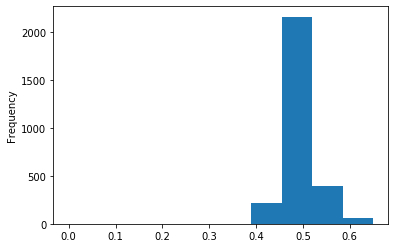

In [5]:
train_df.standard_error.plot.hist()

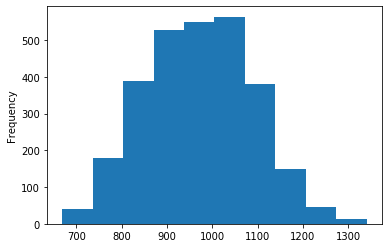

In [12]:
excerpt_len = train_df.excerpt.str.len()
excerpt_len.plot.hist()

# Features and ML

In [15]:
# feature selection 
features = train_df.excerpt
target = train_df.target
print(features.shape, target.shape)

(2834,) (2834,)


In [28]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    train_size=.92, 
                                                    random_state=42)

In [46]:
# create and test model/pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

pipe = Pipeline([
#     ('vect', CountVectorizer(stop_words='english', max_df=0.7)),
#     ('tfidf', TfidfTransformer()),
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('model', model),
])

pipe.fit(X_train, y_train)

train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)

pred = pipe.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)

print("Train score:", train_score)
print("test score:", test_score)
print("RMSE:", rmse)

Train score: 0.9999104379290256
test score: 0.4775119660884475
RMSE: 0.7235034637962634


# Submission

In [36]:
test_df = pd.DataFrame(pd.read_csv('../resources/test.csv'))
test_df

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...
5,12537fe78,NaN,NaN,"To explain transitivity, let us look first at ..."
6,965e592c0,https://www.africanstorybook.org/#,CC BY 4.0,Milka and John are playing in the garden. Her ...


In [37]:
test_id = test_df.id
test_target = pipe.predict(test_df.excerpt)
submit_df = pd.DataFrame({'id':test_id,'target':test_target})
submit_df

,id,target
0,c0f722661,-2.282411
1,f0953f0a5,-0.057161
2,0df072751,-0.261841
3,04caf4e0c,-1.600011
4,0e63f8bea,-1.095395
5,12537fe78,-0.959003
6,965e592c0,-0.080879


In [40]:
submit_df.to_csv('../output/submission.csv', index=False)